In [1]:
import seml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
data = seml.get_results("idrs", to_data_frame=True)
data.fillna("None",inplace=True)

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

In [3]:
datasets = data["config.dataset_name"].unique()
base_sigmas = data["config.base_sigma"].unique()
sigmas = data["config.sigma"].unique()
all_combinations = list(itertools.product(datasets, base_sigmas, sigmas))

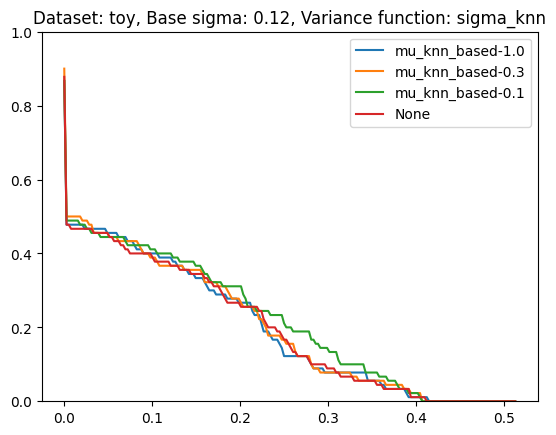

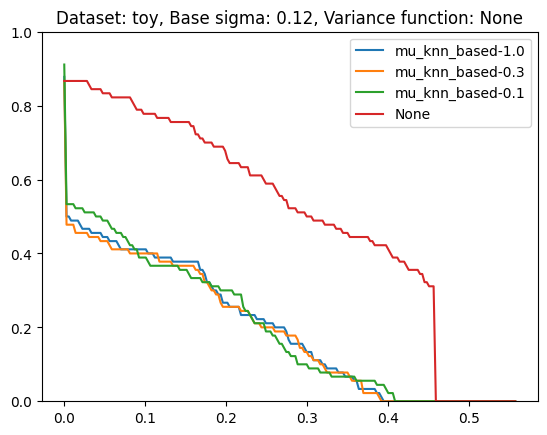

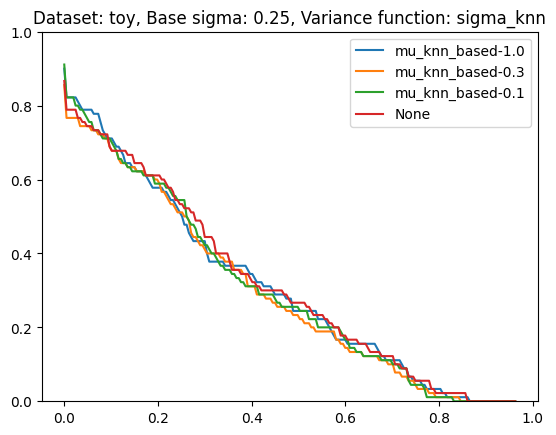

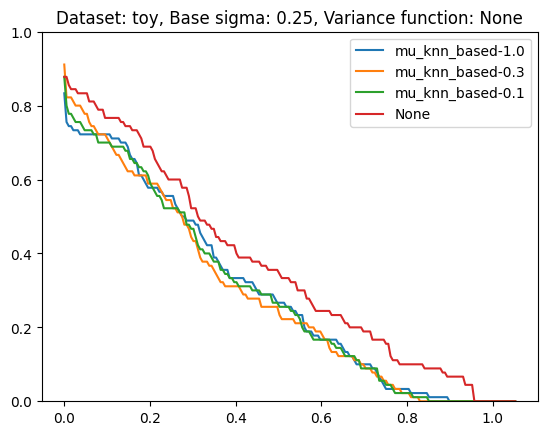

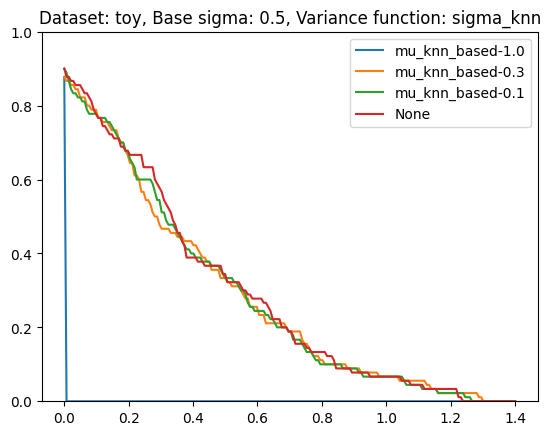

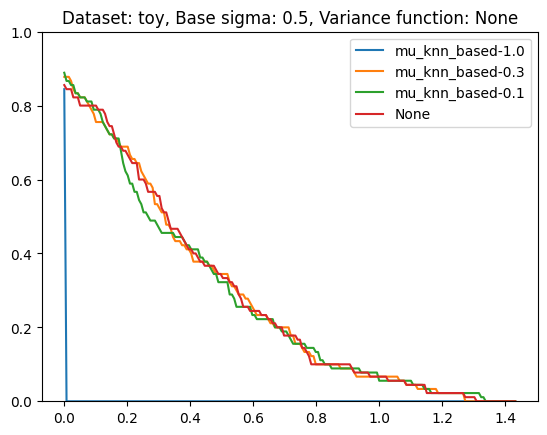

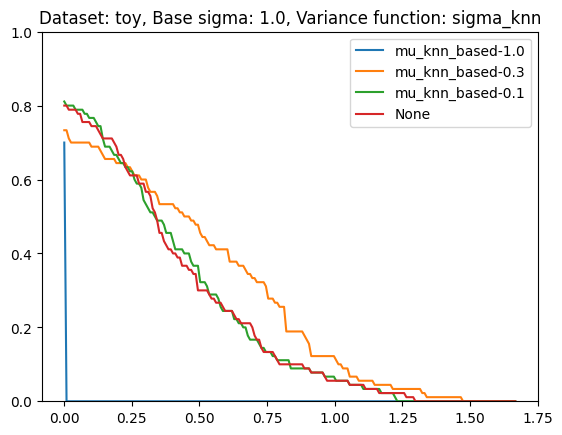

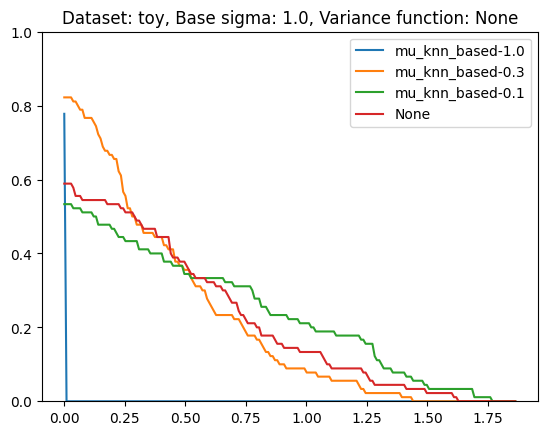

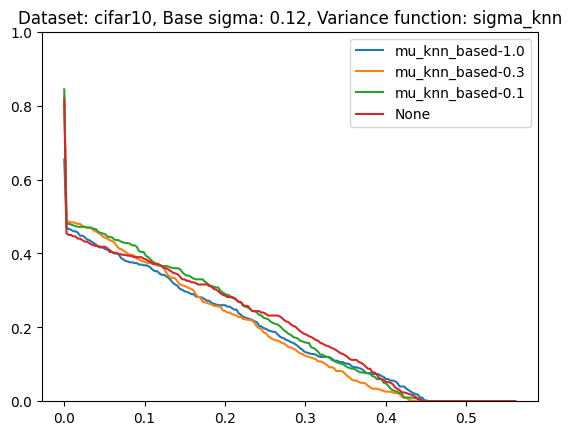

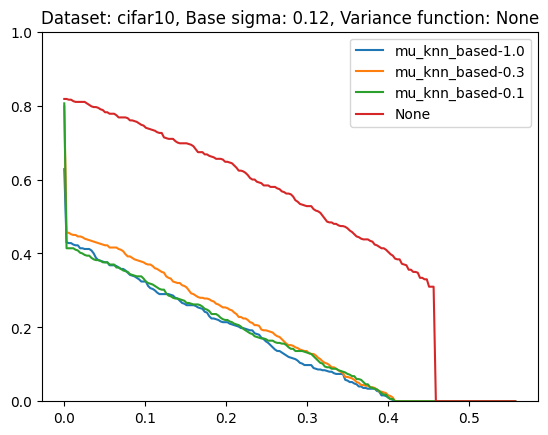

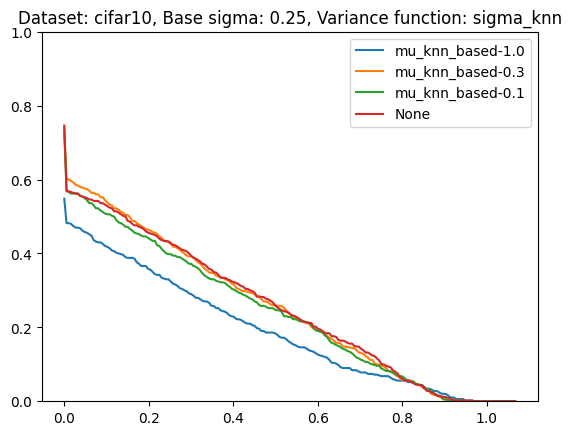

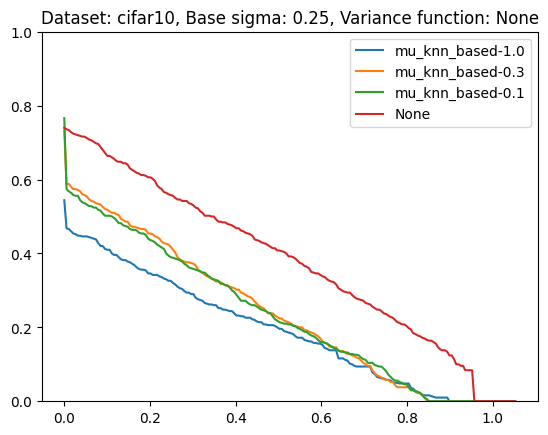

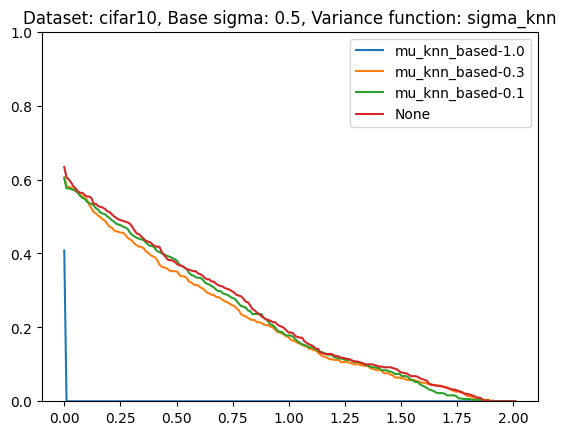

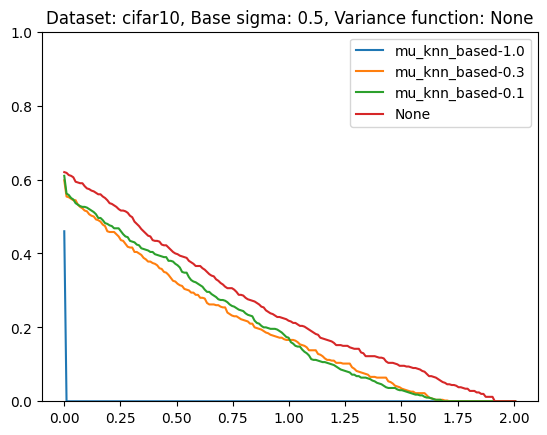

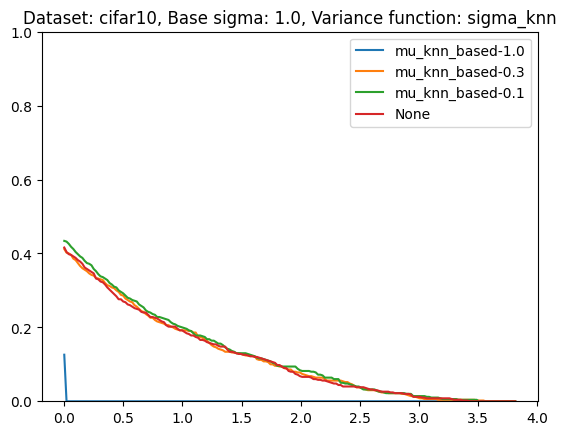

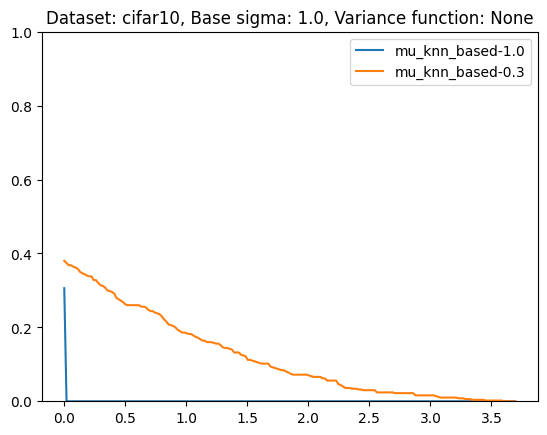

In [4]:
counter = 0
for dataset, base_sigma, sigma in all_combinations:
    results = data[(data["config.dataset_name"] == dataset) &
                (data["config.base_sigma"] == base_sigma) &
                (data["config.sigma"] == sigma)]
    available_mu = results["config.mu"].unique()

    results_per_mu = {}
    fraction_per_radius = {}
    max_radius = 0
    for mu_ in available_mu:
        mu_results = pd.DataFrame(results[results["config.mu"] == mu_].result.values[0])
        max_radius = max(max_radius, mu_results.certified_radius.max())
        results_per_mu[mu_] = mu_results
        fraction_per_radius[mu_] = np.ndarray(200)

    radii = np.linspace(0, max_radius + 0.1, num=200)

    for i, radius in enumerate(radii):
        for mu_ in available_mu:
            current_data = results_per_mu[mu_]
            current_data = pd.concat([current_data.drop(['correct'], axis=1), current_data['correct'].apply(pd.Series)], axis=1)
            robust_set = current_data[pd.to_numeric(current_data['certified_radius']) >= radius]
            if len(robust_set) == 0:
                fraction_per_radius[mu_][i] = 0
            else:
                fraction_correct = len(robust_set[robust_set["current_sample"] == 1])
                fraction_per_radius[mu_][i] = fraction_correct / len(current_data)

    plt.figure(counter)
    for mu_ in available_mu:
        plt.plot(radii, fraction_per_radius[mu_], '-', label=mu_)
    plt.ylim([0, 1])
    plt.legend()
    plt.title(f"Dataset: {dataset}, Base sigma: {base_sigma}, Variance function: {sigma}")
    plt.savefig(f"biased_certified_accuracy_plots/{dataset}_{base_sigma}_{sigma}.pdf")

    counter += 1

In [6]:
results = data[(data["config.dataset_name"] == "cifar10") &
                (data["config.base_sigma"] == 0.12) &
                (data["config.sigma"] == "sigma_knn")]

In [8]:
mu_results = pd.DataFrame(results[results["config.mu"] == "None"].result.values[0])

In [16]:
len(mu_results[mu_results.certified_radius > 0.0])/500

0.598